In [ ]:
## Used: https://www.tensorflow.org/tutorials/keras/classification


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape


(10000, 28, 28)

In [12]:
test_images.shape

(10000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

###Prepare Data


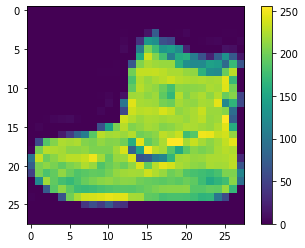

In [15]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
train_images = train_images / 255.0

test_images = test_images / 255.0

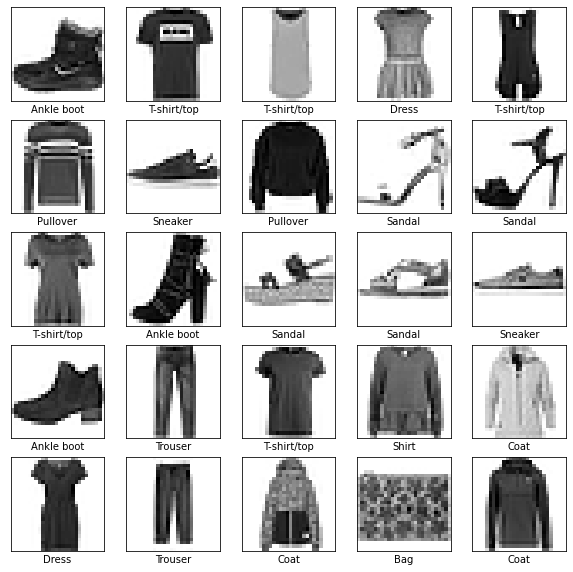

In [22]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

###Build Model


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###Train Model


In [25]:
model.fit(train_images, train_labels, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0676 - accuracy: 0.6670
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6335 - accuracy: 0.7721
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5564 - accuracy: 0.8012
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5143 - accuracy: 0.8180
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4870 - accuracy: 0.8277
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4673 - accuracy: 0.8357
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4521 - accuracy: 0.8401
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4406 - accuracy: 0.8450
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4308 - accuracy: 0.8487
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.422

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4547 - accuracy: 0.8354 - 508ms/epoch - 2ms/step

Test accuracy: 0.8353999853134155


In [29]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([1.8143862e-07, 1.8330681e-08, 2.3441341e-06, 1.9843626e-06,
       6.1827950e-06, 9.6099220e-02, 4.5933625e-06, 3.2332492e-01,
       2.9100352e-03, 5.7765055e-01], dtype=float32)

In [30]:
np.argmax(predictions[0])


9

In [31]:
test_labels[0]


9

In [34]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

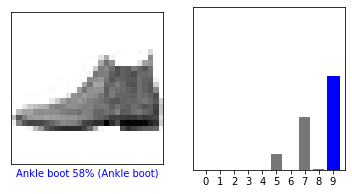

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

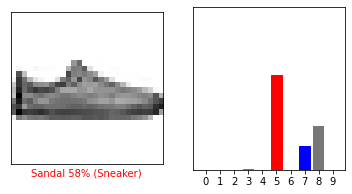

In [36]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

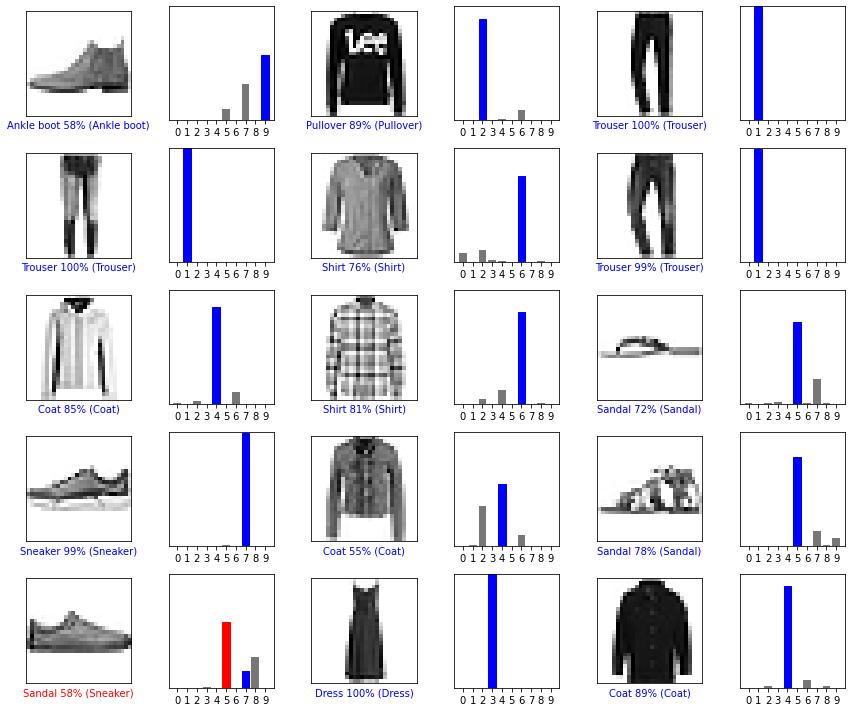

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

##Use the trained model

In [38]:
img = test_images[1]

print(img.shape)

(28, 28)


In [39]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [40]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[3.14543402e-04 7.25992868e-06 8.91349971e-01 1.11996684e-04
  1.30586345e-02 3.34223649e-09 9.48221460e-02 1.47013302e-13
  3.35484598e-04 4.17480044e-11]]


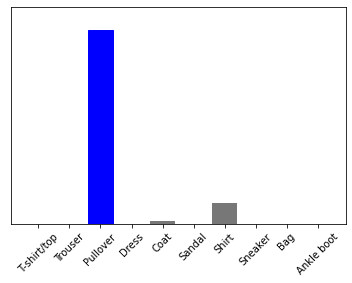

In [41]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [42]:
np.argmax(predictions_single[0])


2

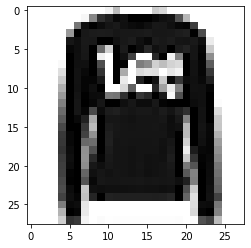

In [43]:
plt.imshow(test_images[1], cmap=plt.cm.binary)